In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

plt.rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_excel('/Users/iwonho/Desktop/포트폴리오/cluster.xlsx')
df.set_index('부산광역시', inplace=True)
df_cols = df.columns

# StandardScaler 표준화

In [4]:
standard_scaler = StandardScaler()
df_sc = pd.DataFrame(standard_scaler.fit_transform(df), columns=df_cols, index=df.index)
df_sc.head()

,불연성쓰레기양,유동인구,면적대비주택수
부산광역시,,,
중구,-0.444269,-1.311311,2.253573
서구,-1.077220,-0.801406,0.472659
동구,-1.040404,-0.884950,1.308735
영도구,-1.041820,-0.568061,0.521063
부산진구,1.073680,0.506483,0.208865


# Hierarchical Clustering

중복을 허용하여 clustering(=군집 재에 군집이 속할 수 있음)
일정 높이에서 dendrogram을 잘라서 군집의 수 결정한다

- cluster 간의 거리를 측정하는 방법
    - single (군집 간 element끼리의 거리 중 min을 군집 간 거리로 설정)
    - complete (군집 간 element끼리의 거리 중 max를 군집 간 거리로 설정)
    - average (군집 간 element끼리의 모든 거리를 average)
    - centroid(군집의 centroid끼리의 거리)
    - ward(두 군집 간 제곱합 - (군집 내 제곱합의 합))

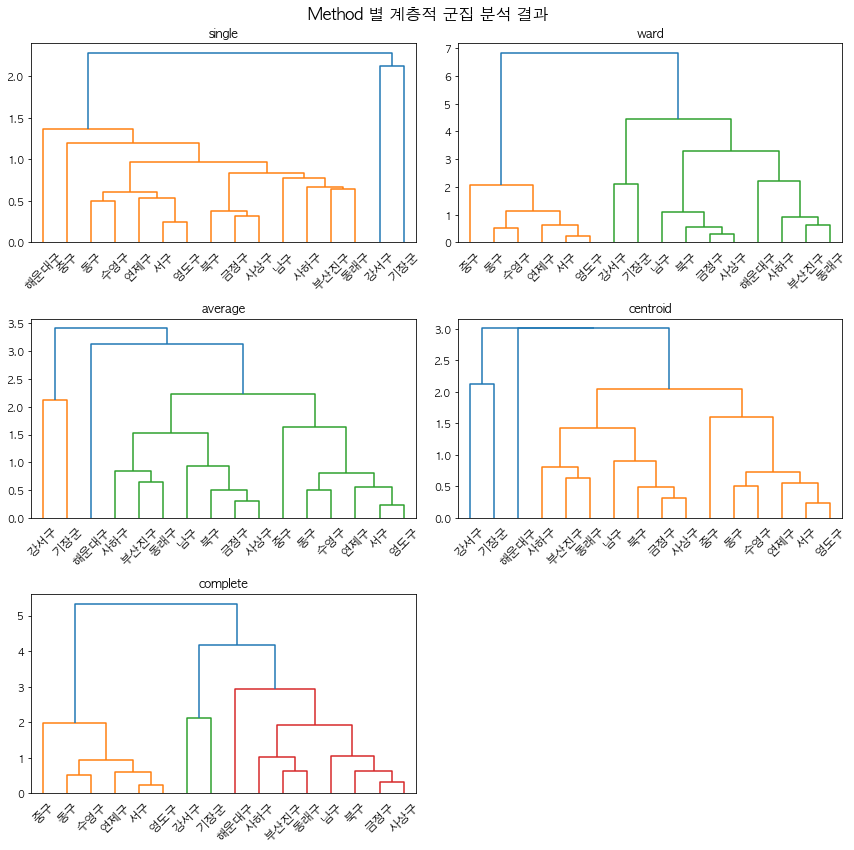

In [5]:
linkage_list = ['single','ward','average','centroid','complete']
data = df_sc
labels = df_sc.index.to_list()
fig = plt.figure(figsize=(12, 12), facecolor='white')
for i in range(len(linkage_list)):
    ax = fig.add_subplot(3, 2, i + 1)
    hierarchical = linkage(data, method=linkage_list[i])
    dn = dendrogram(hierarchical, labels=labels, ax=ax, leaf_rotation=45)
    ax.title.set_text(linkage_list[i])
fig.suptitle('Method 별 계층적 군집 분석 결과', fontsize=16)
plt.tight_layout()

# 군집 수 선정

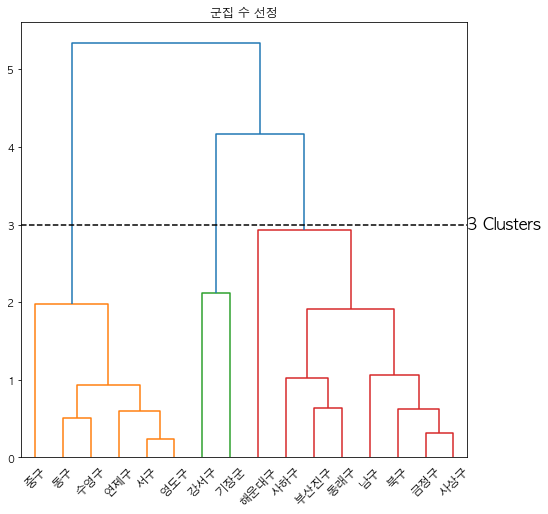

In [6]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
hierarchical = linkage(data, method='complete')
dn = dendrogram(hierarchical, labels=labels, leaf_rotation=45)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [3, 3], '--', c = 'k')
ax.text(bounds[1], 3, '3 Clusters', va='center', fontdict={'size':16})
plt.title('군집 수 선정')
plt.show()

# 군집별 현황

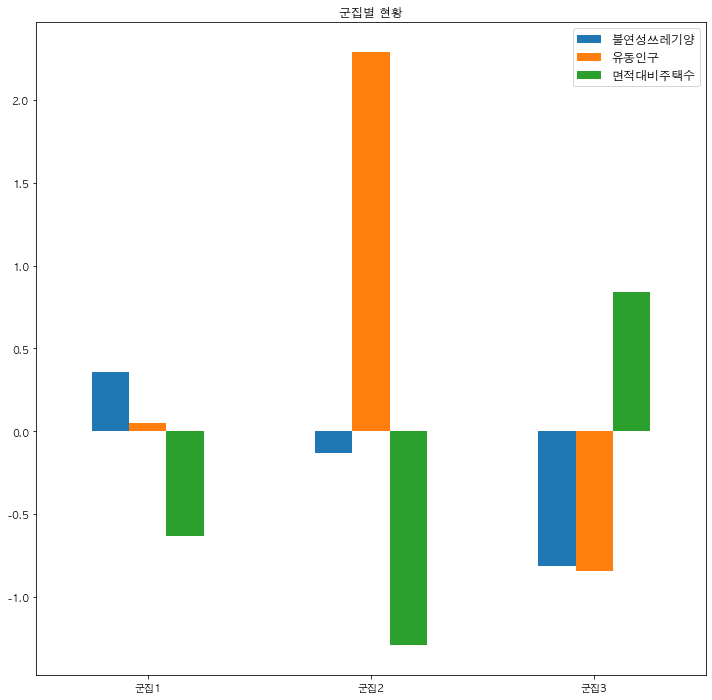

In [10]:
agg_df = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
predict = agg_df.fit_predict(df_sc)
df_sc['cluster'] = predict

cluster = df_sc.copy().groupby('cluster').median()
cluster = cluster.iloc[[0, 2, 1],:]
cluster.index = ['군집1','군집2','군집3']

fig = plt.figure(figsize=(12,12), facecolor='white')
ax = fig.add_subplot(1,1,1)
cluster.plot(kind='bar', ax=ax, title='군집별 현황', rot=0)
plt.legend(fontsize=12, loc='best')
plt.show()